In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine_df = pd.read_csv('winequality-red.csv')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


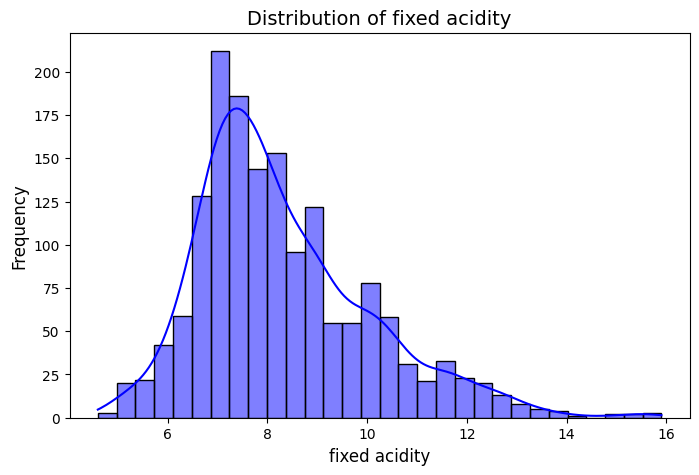

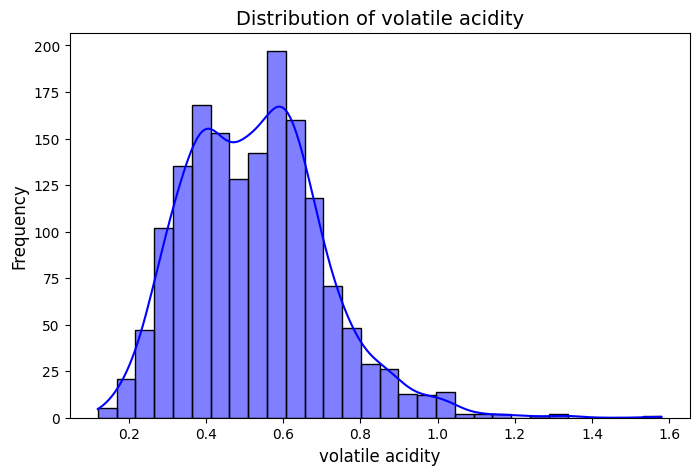

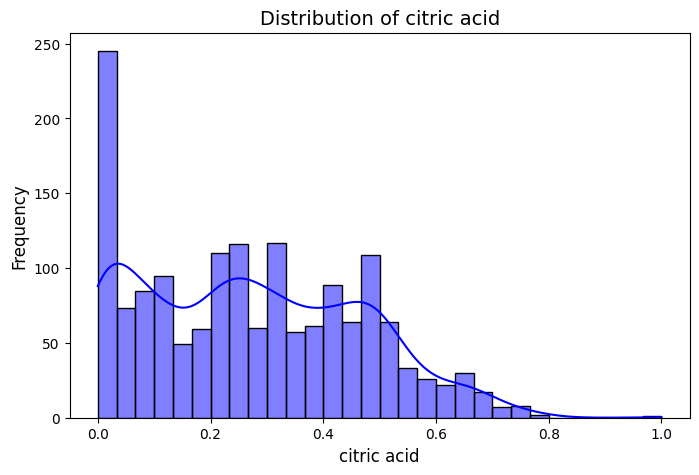

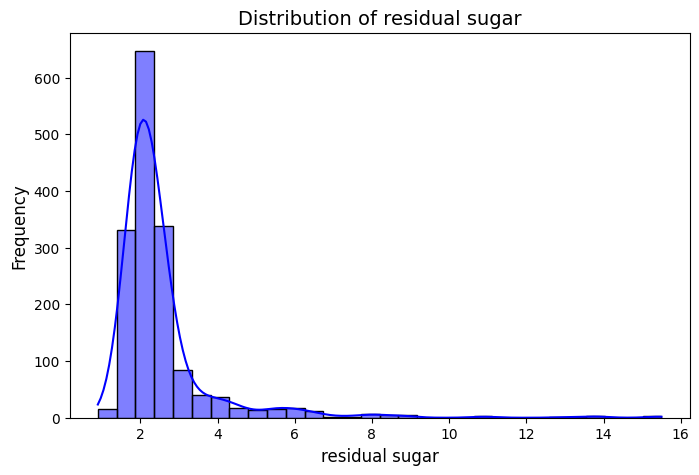

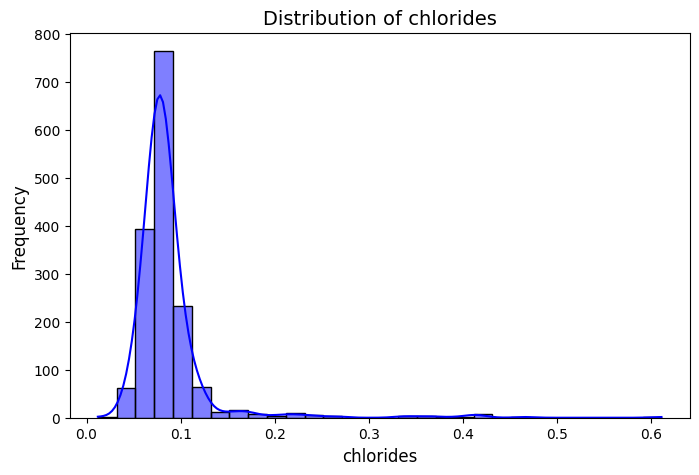

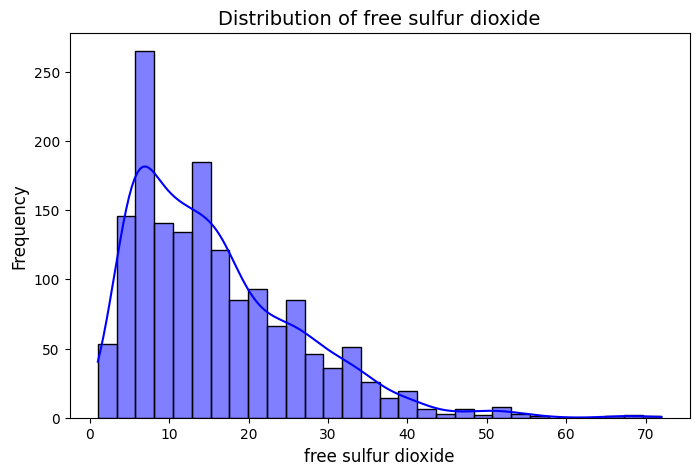

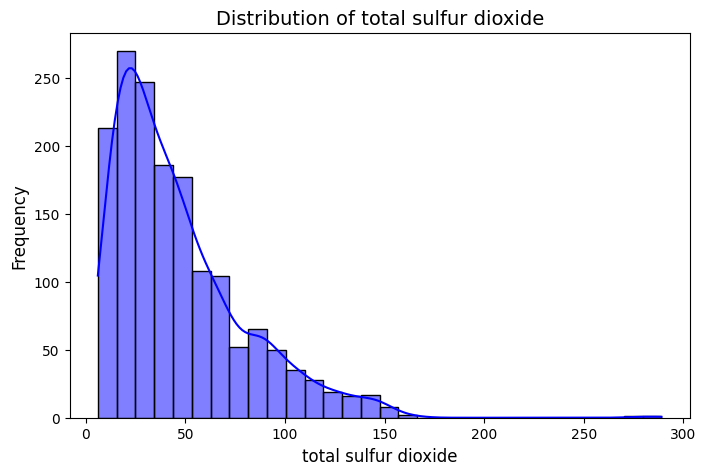

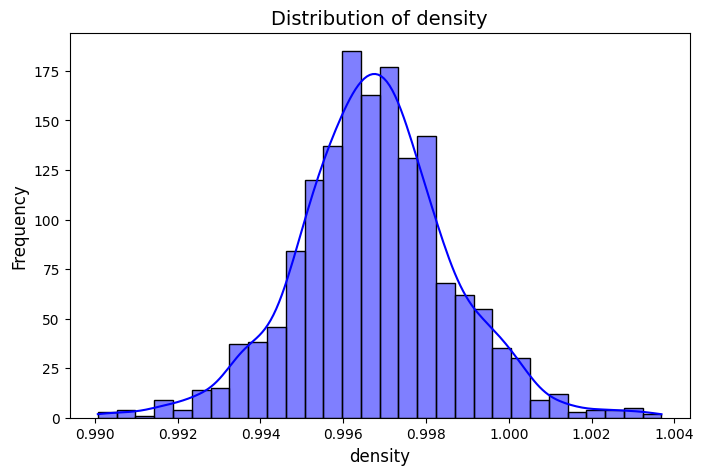

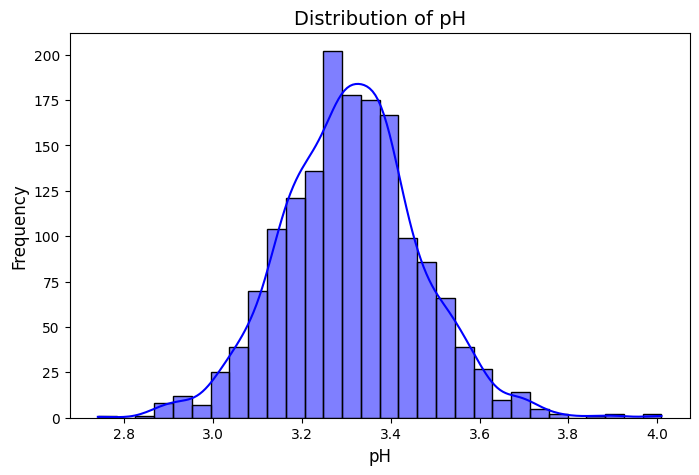

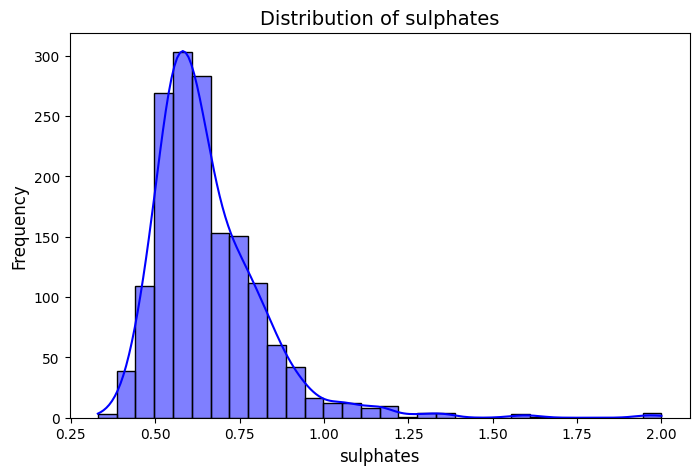

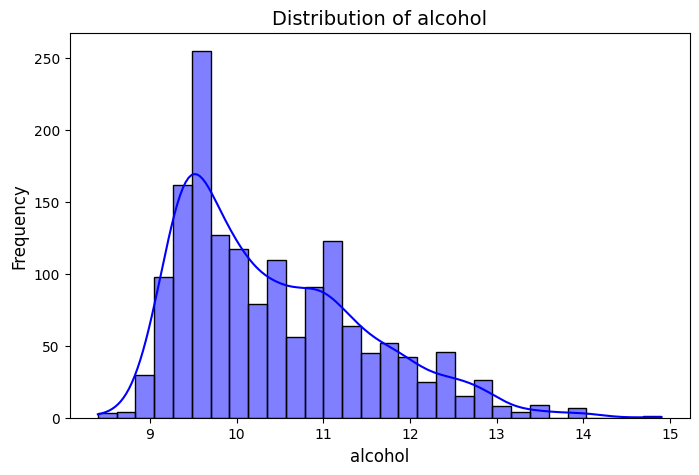

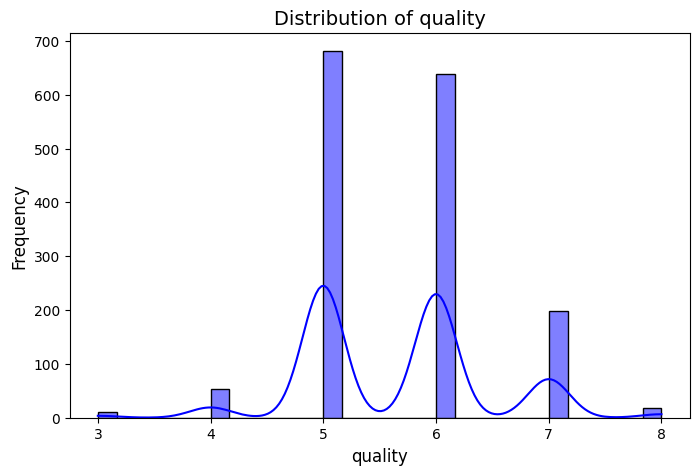

In [6]:
# Plot distributions for all numerical features
for column in wine_df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(wine_df[column], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

In [7]:
# Check for missing or non-numeric values in the dataset
missing_values = wine_df.isnull().sum()
non_numeric_columns = wine_df.select_dtypes(exclude=['number']).columns

# Check for missing or non-numeric values in the dataset
missing_values = wine_df.isnull().sum()
non_numeric_columns = wine_df.select_dtypes(exclude=['number']).columns

# Display missing values summary
print("\nMissing Values Summary:")
print(missing_values[missing_values > 0])



Missing Values Summary:
Series([], dtype: int64)


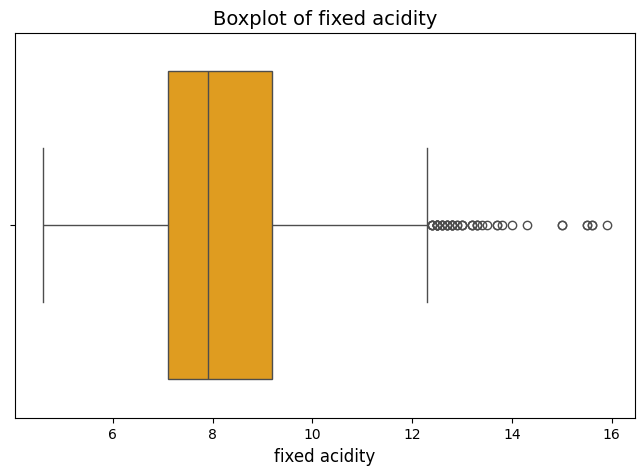

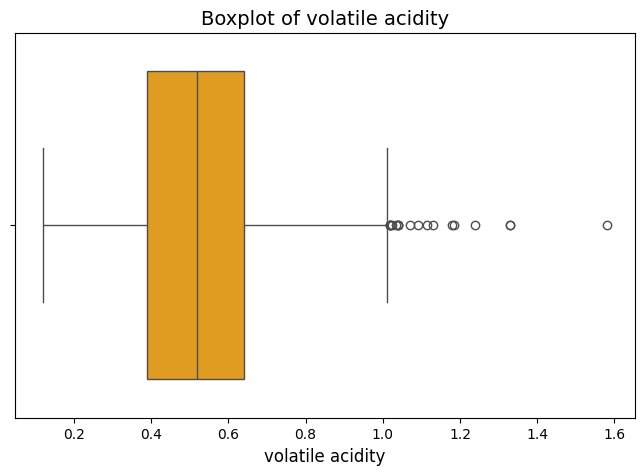

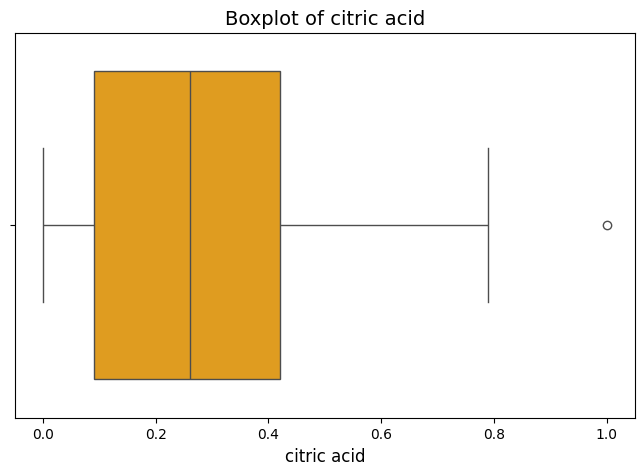

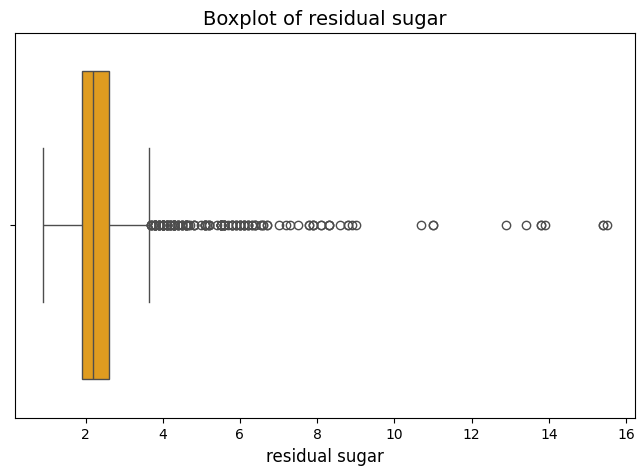

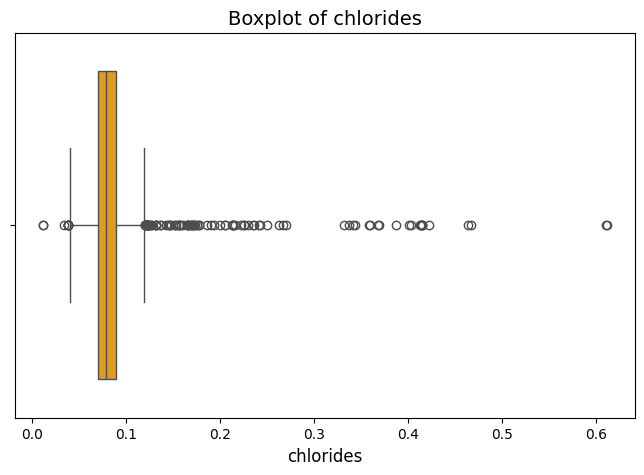

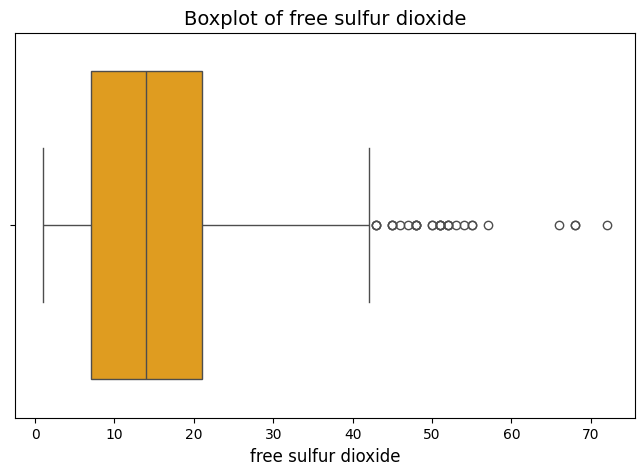

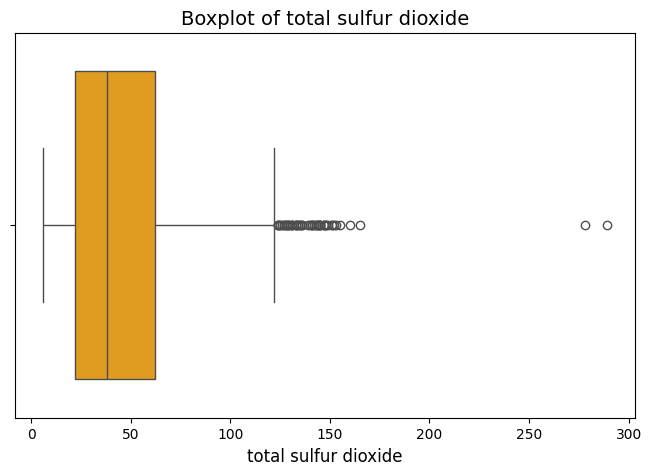

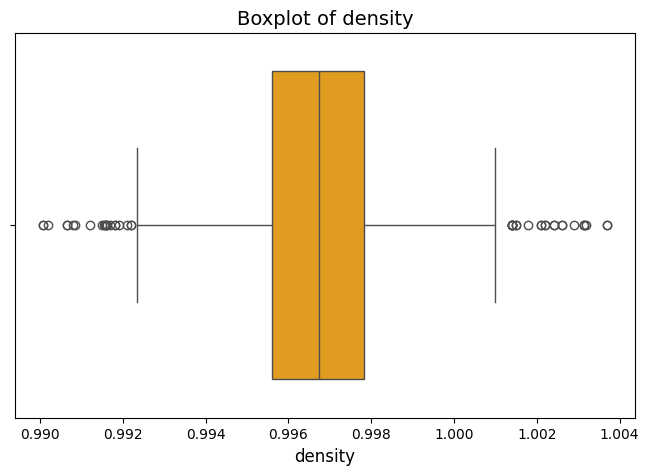

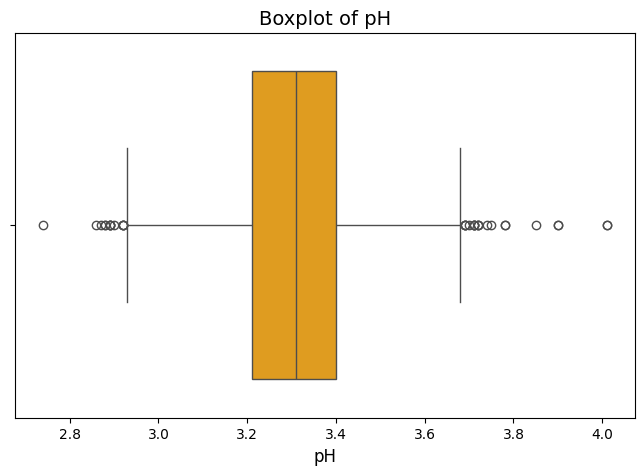

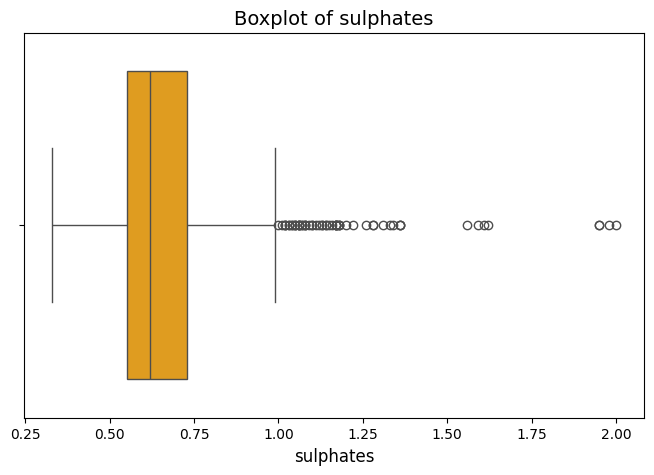

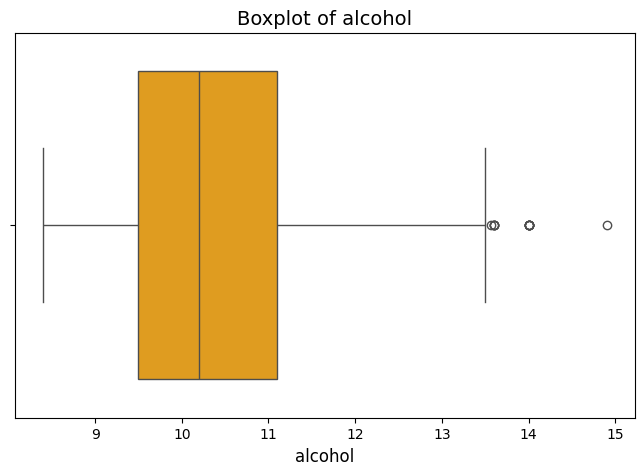

In [8]:
# Boxplots to visualize potential outliers
for column in wine_df.columns[:-1]:  # Exclude 'quality' as it is categorical/ordinal
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=wine_df[column], color="orange")
    plt.title(f"Boxplot of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.show()

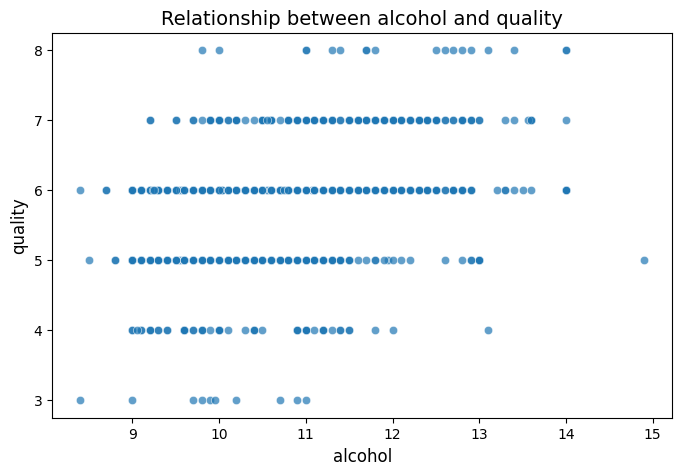

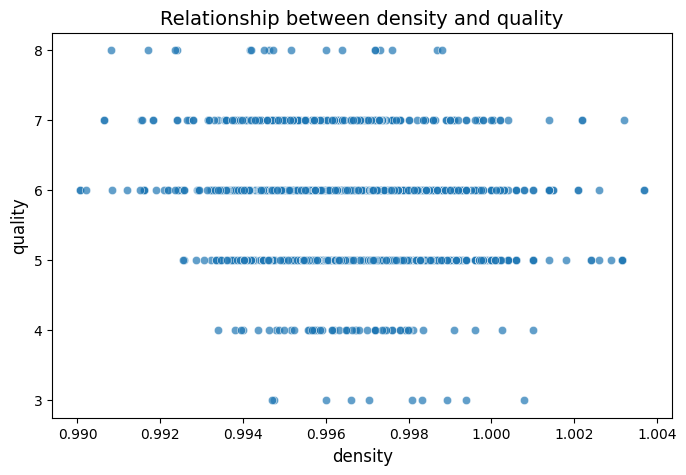

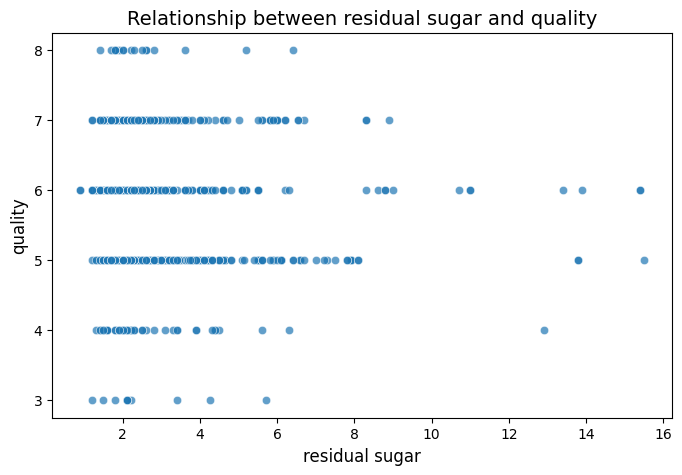

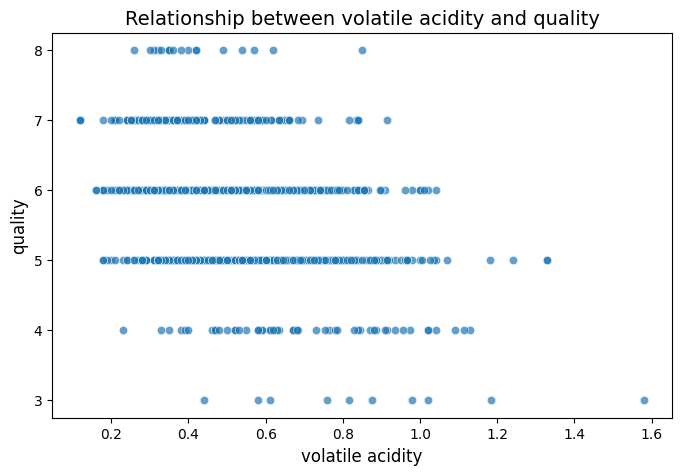

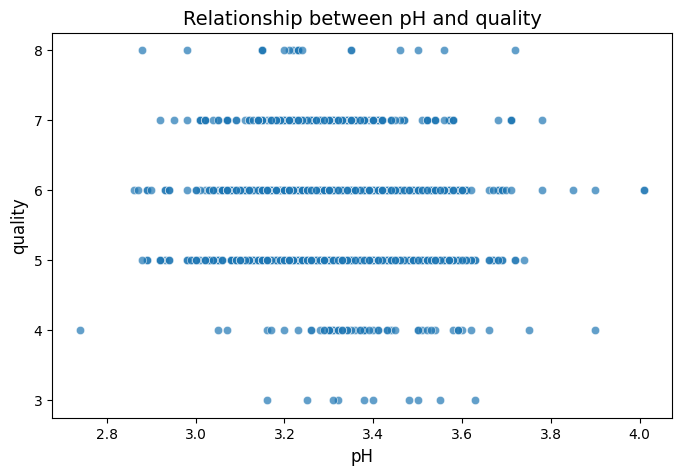

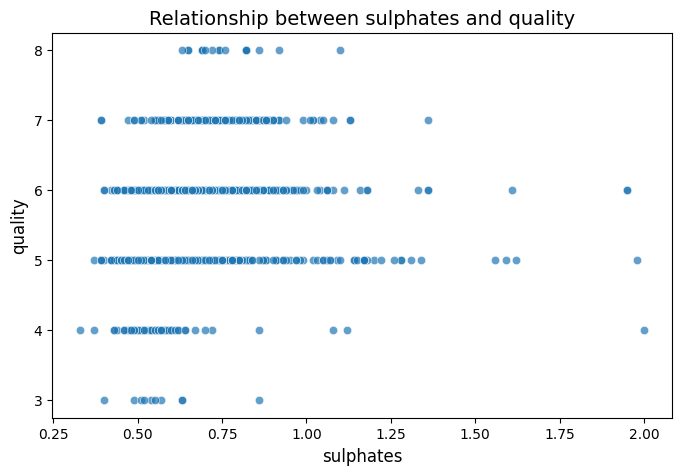

In [9]:
# 1. Scatter plotovi za vizualizaciju odnosa između odabranih parova karakteristika
selected_features = ['alcohol', 'density', 'residual sugar', 'volatile acidity', 'pH', 'sulphates']
target = 'quality'


# Pairwise scatter plots with respect to 'quality'
for feature in selected_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=wine_df[feature], y=wine_df[target], alpha=0.7)
    plt.title(f"Relationship between {feature} and {target}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel(target, fontsize=12)
    plt.show()

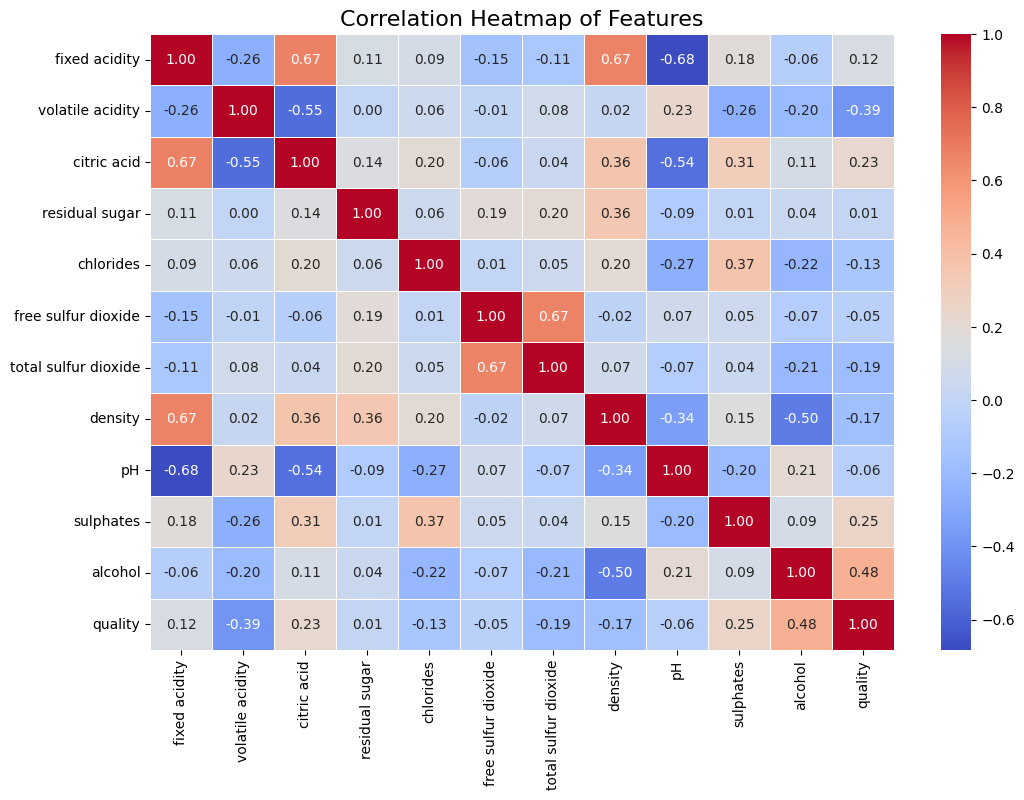

In [10]:
# 2. Heatmap za prikaz korelacije između svih numeričkih karakteristika
plt.figure(figsize=(12, 8))
correlation_matrix = wine_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

<Figure size 800x500 with 0 Axes>

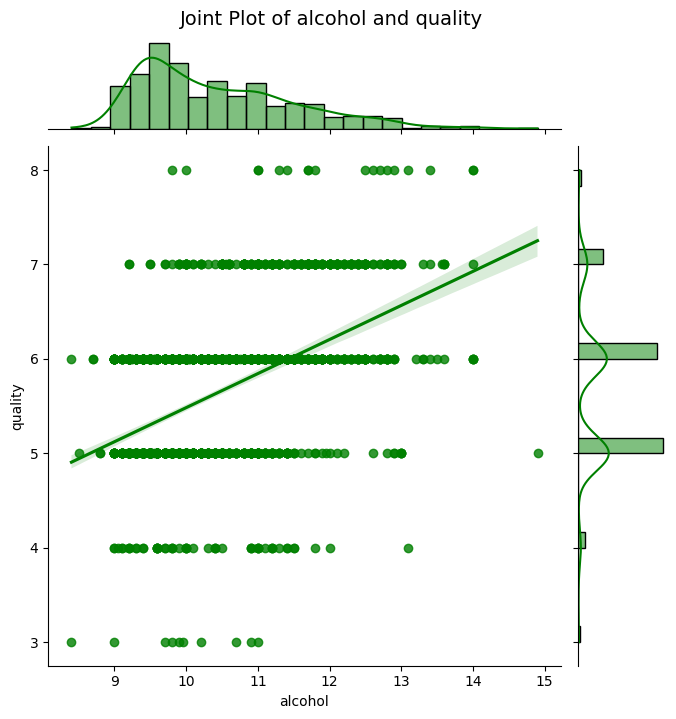

<Figure size 800x500 with 0 Axes>

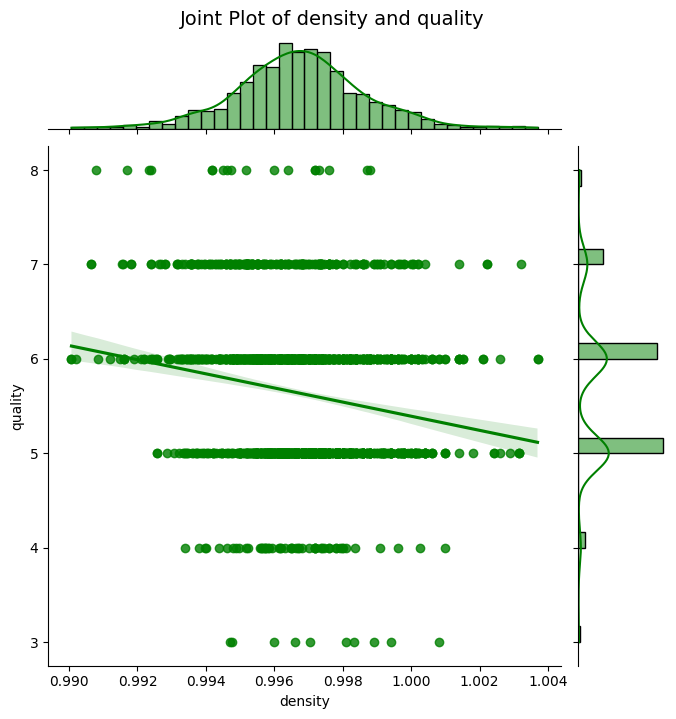

<Figure size 800x500 with 0 Axes>

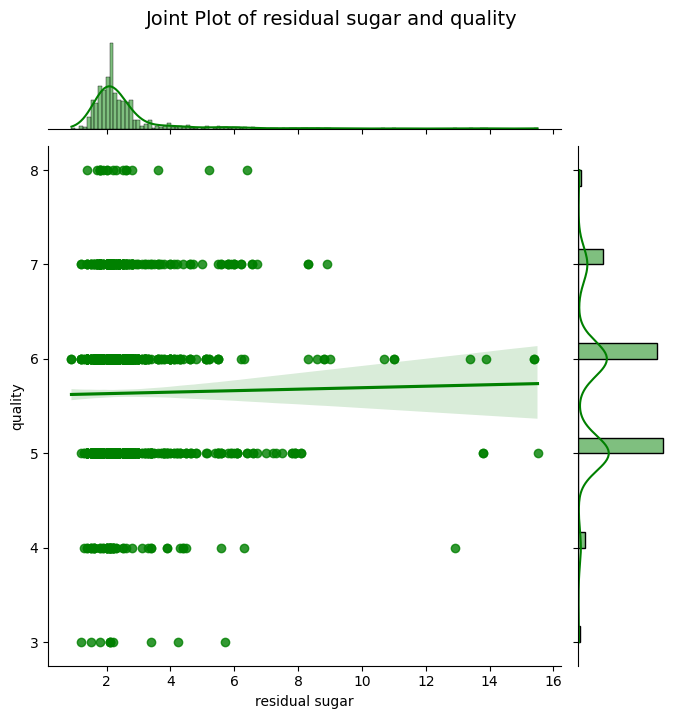

<Figure size 800x500 with 0 Axes>

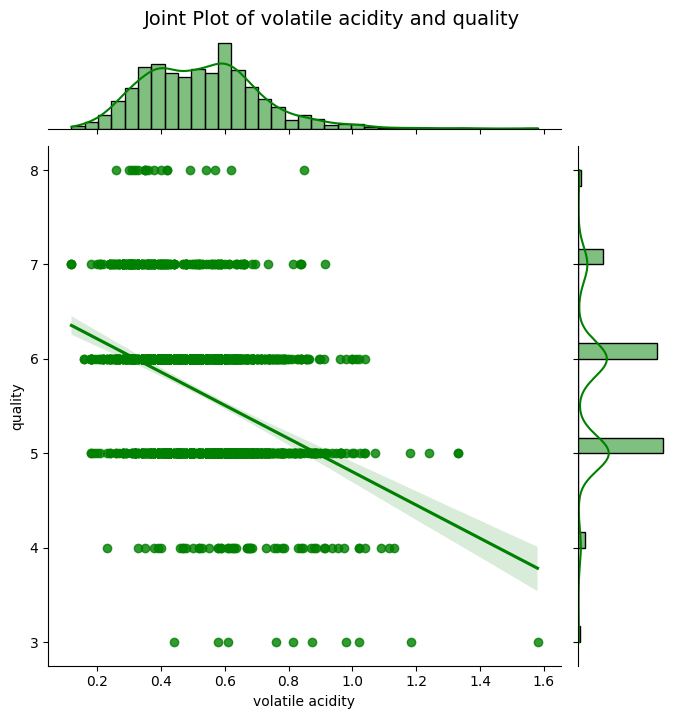

<Figure size 800x500 with 0 Axes>

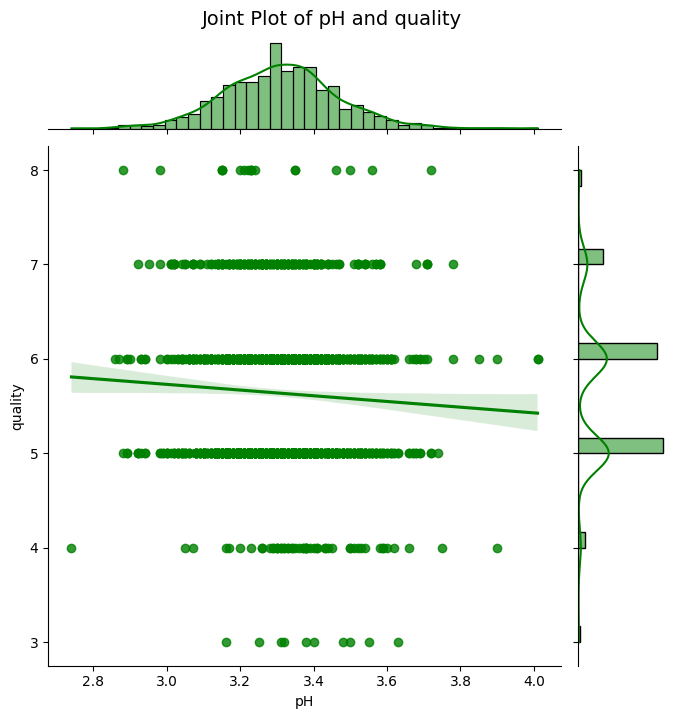

<Figure size 800x500 with 0 Axes>

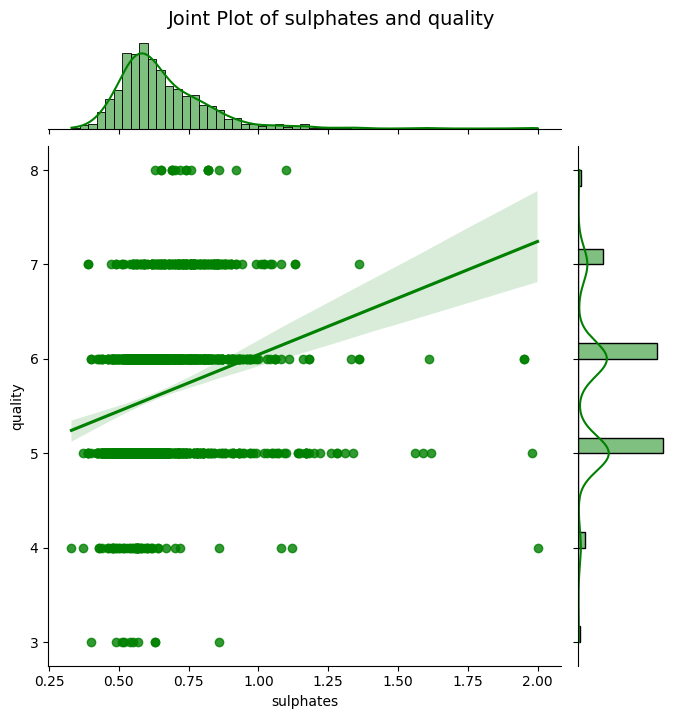

In [11]:
# 3. Jointplots za dublju analizu odnosa između dve karakteristike
for feature in selected_features:
    plt.figure(figsize=(8, 5))
    sns.jointplot(x=wine_df[feature], y=wine_df[target], kind="reg", height=7, color="green")
    plt.suptitle(f"Joint Plot of {feature} and {target}", fontsize=14, y=1.02)
    plt.show()

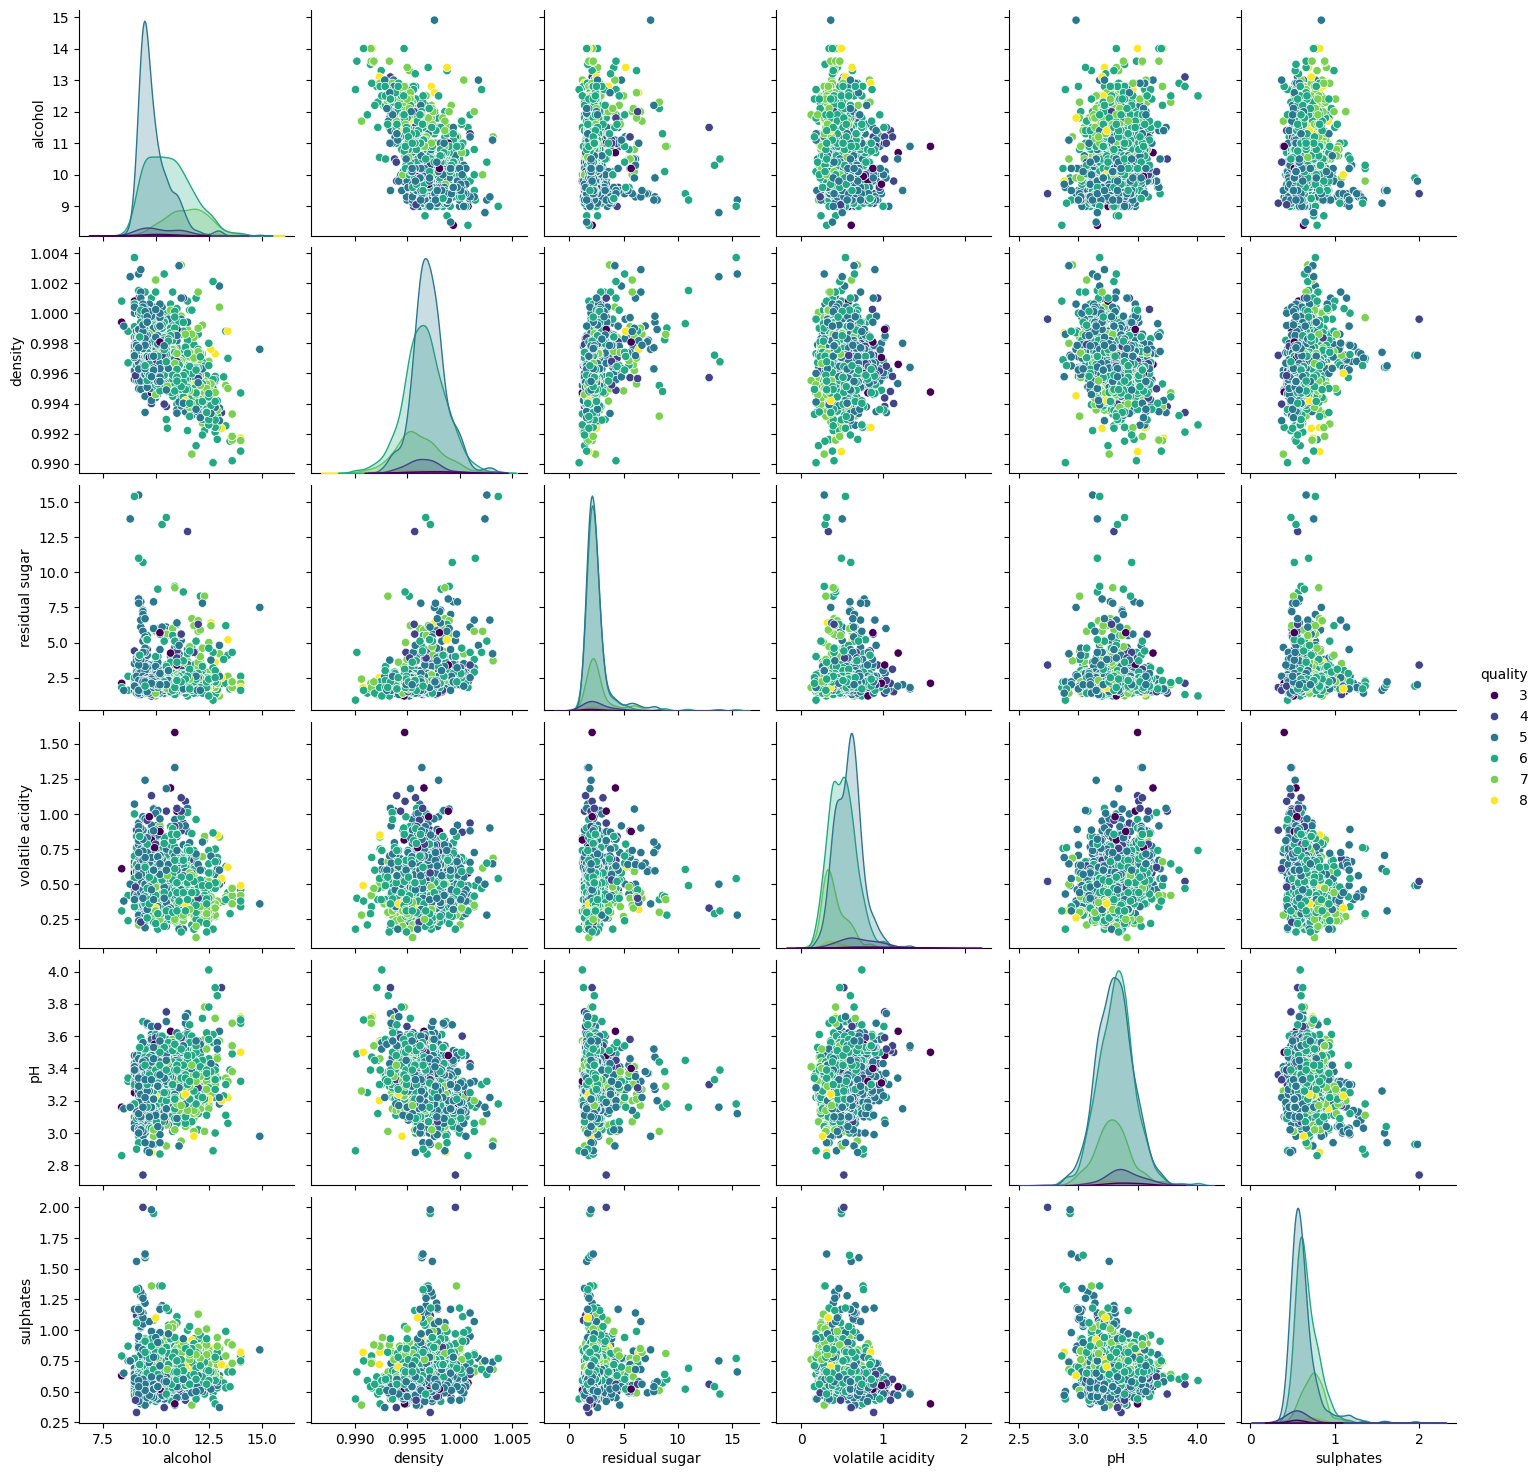

In [12]:
# 4. Pairplot za vizualizaciju više odnosa između karakteristika
sns.pairplot(wine_df[selected_features + [target]], hue=target, diag_kind="kde", palette="viridis")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Čišćenje podataka - Uklanjanje outliera (IQR metod)
def remove_outliers(data):
    cleaned_data = wine_df.copy()
    for column in wine_df.columns[:-1]:  # Exclude 'quality' as it is the target variable
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[
            (cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)
        ]
    return cleaned_data

data_cleaned = remove_outliers(wine_df)

# 2. Normalizacija podataka
scaler = MinMaxScaler()
features = data_cleaned.columns[:-1]  # All columns except the target
data_cleaned[features] = scaler.fit_transform(data_cleaned[features])

# 3. Podela podataka na trening i test skupove
X = data_cleaned[features]
y = data_cleaned['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Prikaz informacija o veličini skupova
dataset_info = pd.DataFrame({
    "Dataset": ["Training Set", "Test Set"],
    "Number of Samples": [X_train.shape[0], X_test.shape[0]]
})
print(dataset_info)



        Dataset  Number of Samples
0  Training Set                955
1      Test Set                239


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 71.13%


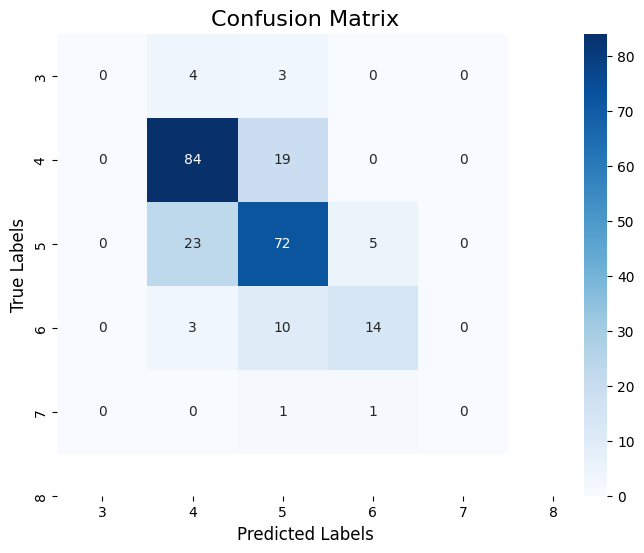

              precision    recall  f1-score     support
4              0.000000  0.000000  0.000000    7.000000
5              0.736842  0.815534  0.774194  103.000000
6              0.685714  0.720000  0.702439  100.000000
7              0.700000  0.518519  0.595745   27.000000
8              0.000000  0.000000  0.000000    2.000000
accuracy       0.711297  0.711297  0.711297    0.711297
macro avg      0.424511  0.410810  0.414475  239.000000
weighted avg   0.683540  0.711297  0.694858  239.000000


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Kreiranje i treniranje Random Forest modela
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predikcija na test skupu
y_pred = rf_model.predict(X_test)

# 3. Evaluacija modela
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Prikaz evaluacije
print(f"Accuracy: {accuracy * 100:.2f}%")

# Prikaz matrice konfuzije
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.show()

# Detaljan izveštaj o klasifikaciji
class_report_df = pd.DataFrame(class_report).transpose()
print(class_report_df)


Optimizacija hiperparametara i poredjenje sa drugim modelima

Primer 1: Predviđena klasa = 5
Primer 2: Predviđena klasa = 5
Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Najbolji hiperparametri za Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Logistic Regression Accuracy: 0.61
Support Vector Machine Accuracy: 0.63
Optimized Random Forest Accuracy: 0.71


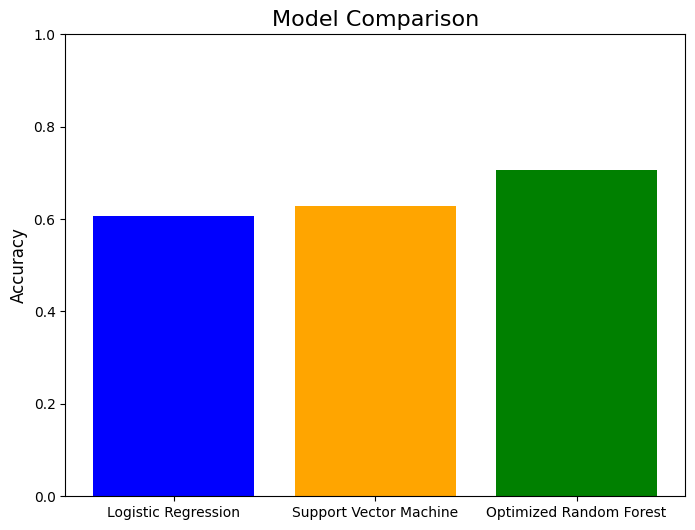

Confusion Matrix for Logistic Regression:


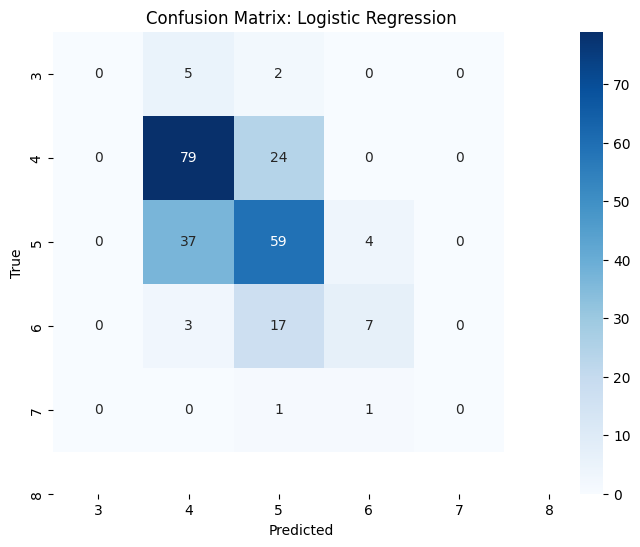

Confusion Matrix for Support Vector Machine:


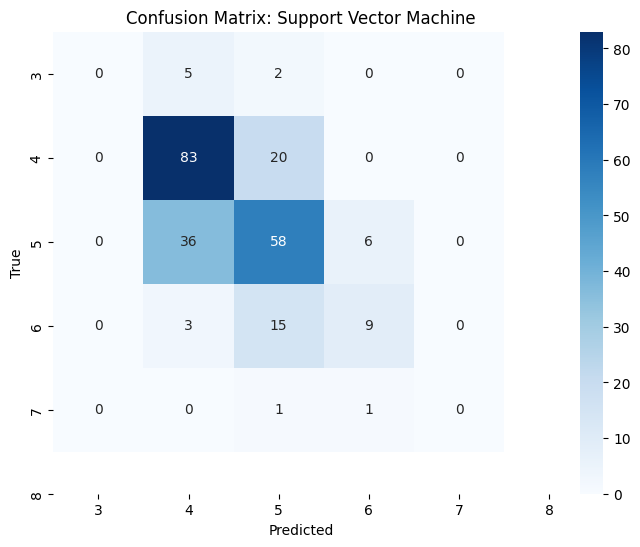

Confusion Matrix for Optimized Random Forest:


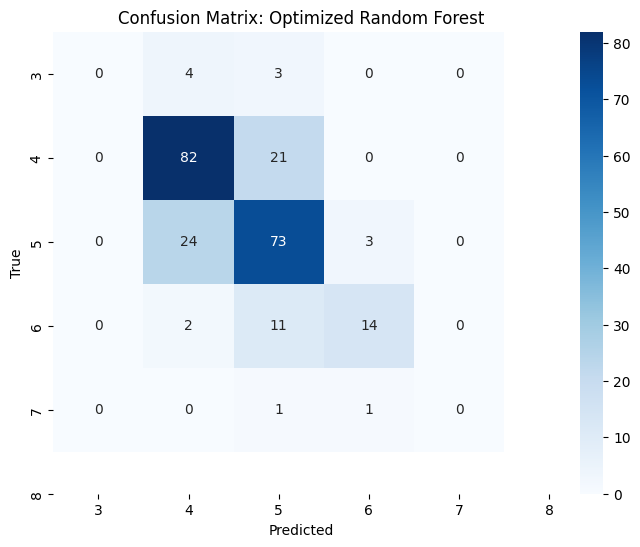

In [15]:
# Ručno testiranje modela na specifičnim primerima
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Unos primera za testiranje (primer: vrednosti karakteristika)
manual_sample = np.array([
    [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4],  # Primer 1
    [8.2, 0.5, 0.3, 2.4, 0.065, 15.0, 60.0, 0.9968, 3.20, 0.40, 10.0] # Primer 2
])

# 2. Normalizacija unetih podataka
manual_sample_normalized = scaler.transform(manual_sample)

# 3. Predikcija klase pomoću treniranog Random Forest modela
predicted_classes = rf_model.predict(manual_sample_normalized)

# Prikaz rezultata
i = 1
for prediction in predicted_classes:
    print(f"Primer {i}: Predviđena klasa = {prediction}")
    i += 1

# 4. Optimizacija hiperparametara Random Forest modela
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV za Random Forest
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
print("Najbolji hiperparametri za Random Forest:")
print(rf_grid_search.best_params_)

# 5. Poređenje sa Logistic Regression i SVM
log_reg = LogisticRegression(max_iter=1000, random_state=42)
svc = SVC(probability=True, random_state=42)

# Treniranje modela
log_reg.fit(X_train, y_train)
svc.fit(X_train, y_train)
best_rf_model.fit(X_train, y_train)

# Predikcije na test skupu
pred_log_reg = log_reg.predict(X_test)
pred_svc = svc.predict(X_test)
pred_rf = best_rf_model.predict(X_test)

# Evaluacija modela
models = {
    "Logistic Regression": pred_log_reg,
    "Support Vector Machine": pred_svc,
    "Optimized Random Forest": pred_rf
}

for model_name, predictions in models.items():
    acc = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {acc:.2f}")

# Vizualni prikaz poređenja
accuracies = [
    accuracy_score(y_test, pred_log_reg),
    accuracy_score(y_test, pred_svc),
    accuracy_score(y_test, pred_rf)
]

plt.figure(figsize=(8, 6))
plt.bar(models.keys(), accuracies, color=['blue', 'orange', 'green'])
plt.title("Model Comparison", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.show()

# Prikaz matrice konfuzije za svaki model
for model_name, predictions in models.items():
    print(f"Confusion Matrix for {model_name}:")
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
